# Scikit-Learn #

### The purpose of this Jupyter Notebook is to demonstrate three different algorithms from the scikit-learn library. ###

scikit-learn is an opensource python library containing tools for predictive data analysis [25]. The library uses NumPy, SciPy and matplotlib under the hood.

scikit-learn provies tools to help with:
 - Classification - Identifying which category an object belongs to
 - Regression - Predicting a continuous-valued attribute associated with an object
 - Clustering - Grouping similar objects into sets
 - Dimensionality reduction - Eliminating random variables from consideration
 - Model selection - Comparing and validating parameters and models
 - Preprocessing - Feature extraction and normalization

For the purposes of this project, using the Iris Dataset, I will demonstrate the following three scikit-learn algorithms:
 1) Linear Regression
 2) Nearest Neighbours
 3) Cross Validation

I will also be using the following libraries to aid in visualisation and analysis:


- **Pandas ** - an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools. [2]
- **Numpy ** – the fundamental package for scientific computing with Python[2]
- **Seaborn ** – a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. [2]
- **Sys ** - System-specific parameters and functions.
This module provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available. [20]

## Fisher’s Iris Dataset
Introduced by British statistician and biologist Ronald Fisher in his 1936 paper entitled “The use of multiple measurements in taxonomic problems”. It is an example of linear discriminate analysis.
The dataset gives the measurements in centimetres of the sepal length and width and petal length and width of 50 flowers from each species of iris: setosa, versicolor, and virginica.
The dataset contains a set of 150 records of 5 attributes:
Sepal length in cm
Sepal width in cm
Petal length in cm
Petal width in cm
Species of iris: setosa, versicolor, virginica[1, 2]

## Importing the Data
Downloading the Iris dataset from the internet using the panda and sys libraries which will enable me to analyse the first few rows of data.

In [2]:
import sys
import pandas as pd
#Downloaded iris dataset from https://tinyurl.com/y8fovkyq

# sys.stdout = open("variables_summary.txt", "w")

iris_data = pd.read_csv('data.csv')

iris_data.columns = ['sepal_length', 'sepal_width',
                     'petal_length', 'petal_width', 'variety']

iris_data.head(10)

iris_data.shape
print(iris_data)

     sepal_length  sepal_width  petal_length  petal_width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


## Summary Chart (or a much nicer view of the min, max, mean, std dev)

In [86]:
import sys
import pandas as pd

iris_data = pd.read_csv('data.csv')

iris_data.columns = ['sepal_length', 'sepal_width',
                     'petal_length', 'petal_width', 'variety']

#Gathered a summary of the data (count, mean, std deviation, minumin, 25%, 50%, 75%, maximum)
#Used call chaining to make code look pretty.

summary = iris_data.describe().transpose().head()
print(summary)

# sys.stdout.close()

              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5



Judging from the above chart, we can see a big range between sepal length and petal length. Next, we will see if this range is determined by the species of iris.

## Classification

## Boxplots
Boxplots are useful because they offer a quick and visually pleasing way to compare data[2][11].
In this case, I have four separate boxplots comparing the distributions across the variables and varieties of iris. First, I compare the sepal length, then sepal width, then the petal length and then, finally, the petal width for each species: Setosa, Versicolor, Virginica

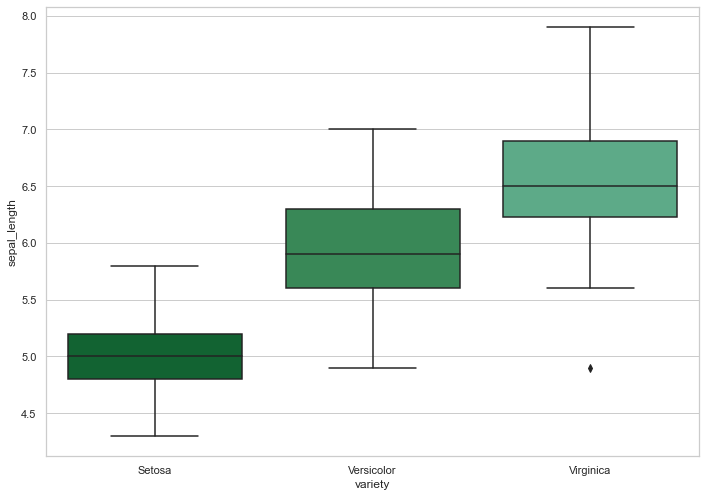

In [3]:
import sys
import seaborn as sns

sns.set(style="whitegrid", palette="BuGn_r",
        rc={'figure.figsize': (11.7, 8.27)})

title = "Compare Distributions of Sepal Length"

sns.boxplot(x="variety", y="sepal_length", data=iris_data)

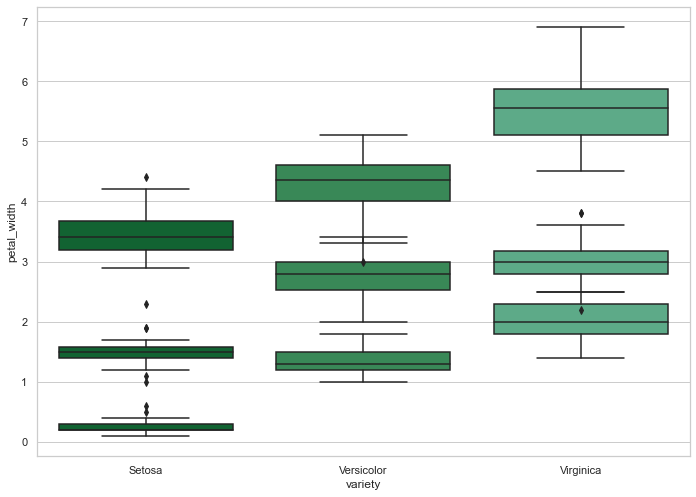

In [6]:
import sys
import pandas as pd
import seaborn as sns

iris_data = pd.read_csv('data.csv')

iris_data.columns = ['sepal_length', 'sepal_width',
                     'petal_length', 'petal_width', 'variety']

sns.set(style="whitegrid", palette="BuGn_r",
        rc={'figure.figsize': (11.7, 8.27)})

title = "Compare Distributions of Sepal Width"

sns.boxplot(x="variety", y="sepal_width", data=iris_data)


sns.set(style="whitegrid", palette="BuGn_r",
        rc={'figure.figsize': (11.7, 8.27)})

title = "Compare Distributions of Petal Length"

sns.boxplot(x="variety", y="petal_length", data=iris_data)

sns.set(style="whitegrid", palette="BuGn_r",
        rc={'figure.figsize': (11.7, 8.27)})

title = "Compare Distributions of Petal Width"

sns.boxplot(x="variety", y="petal_width", data=iris_data)

## Scatterplots
With scatterplots we can use variables to show that there is distinct difference in sizes between the species.

In [92]:
import sys
import pandas as pd
import seaborn as sns
from bokeh.plotting import figure, output_notebook, show

iris_data = pd.read_csv('data.csv')

iris_data.columns = ['sepal_length', 'sepal_width',
                     'petal_length', 'petal_width', 'variety']

output_notebook()

color1 = '#FF1493'
color2 = '#9400D3'
color3 = '#008080'

#Adding colours
colormap = {'Setosa': color1, 'Versicolor': color2, 'Virginica': color3}
colors = [colormap[x] for x in iris_data['variety']]

#Comparing Petal Width and Petal Length across all three species
p = figure(title="Petal Width and Petal Length")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.diamond(iris_data["petal_length"], iris_data["petal_width"],
          color=colors, fill_alpha=0.2, size=10)

show(p)

#Comparing Sepal Width and Sepal Length across all three species
output_notebook()

#adding colors
colormap = {'Setosa': color1, 'Versicolor': color2, 'Virginica': color3}
colors = [colormap[x] for x in iris_data['variety']]

#adding labels
p = figure(title="Sepal Width and Sepal Length")
p.xaxis.axis_label = 'Sepal Length'
p.yaxis.axis_label = 'Sepal Width'

p.circle(iris_data["sepal_length"], iris_data["sepal_width"],
         color=colors, fill_alpha=0.2, size=10)

show(p)



Loading BokehJS ...

Loading BokehJS ...


In the scatterplots we can see that the iris Setosa is clearly the smallest flower in terms of both sepal length and width and petal length and width. Iris Virginica, as we can see in the scatterplots, is the largest.

## Pairplot
I decided to use a pairplot here because it “creates a matrix of axes and shows the relationship for each pair of columns in a data frame. By default, it also draws the univariate distribution of each variable on the diagonal axis”[12].
This way, we have all the data points available to us in one place to analyse.

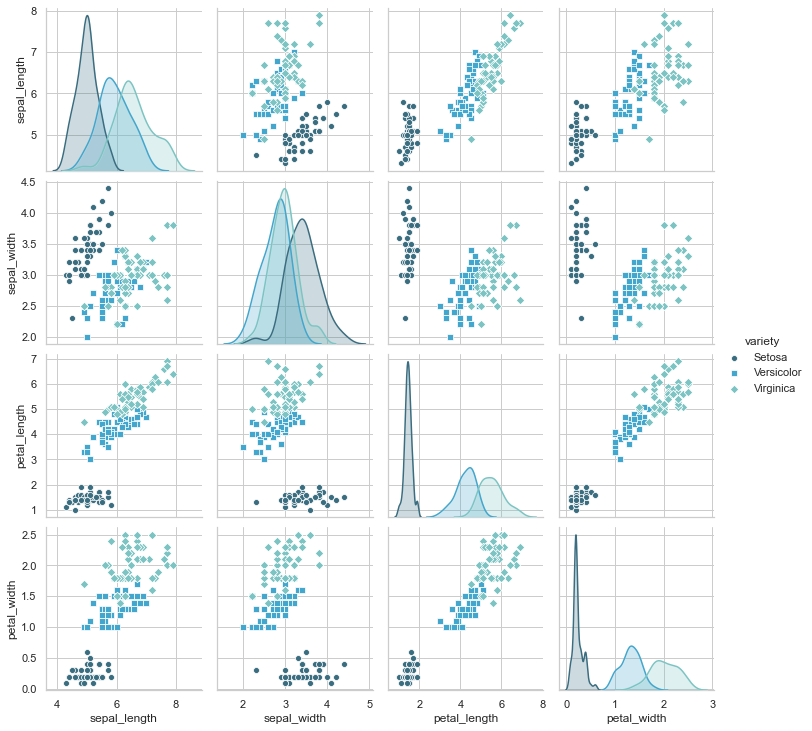

In [30]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
import sklearn.neighbors as nei
import sklearn.model_selection as mod


iris_data = pd.read_csv('data.csv')

iris_data.columns = ['sepal_length', 'sepal_width',
                     'petal_length', 'petal_width', 'variety']

sns.pairplot(iris_data, hue="variety",
             palette="GnBu_d", markers=["o", "s", "D"])

plt.show()

### Two Dimensions ###

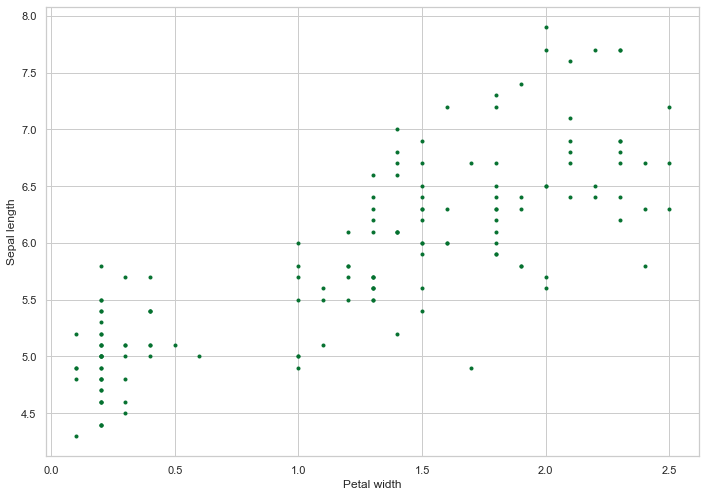

In [13]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(iris_data['petal_width'], iris_data['sepal_length'], '.')

# Set axis labels.
ax.set_xlabel('Petal width');
ax.set_ylabel('Sepal length');

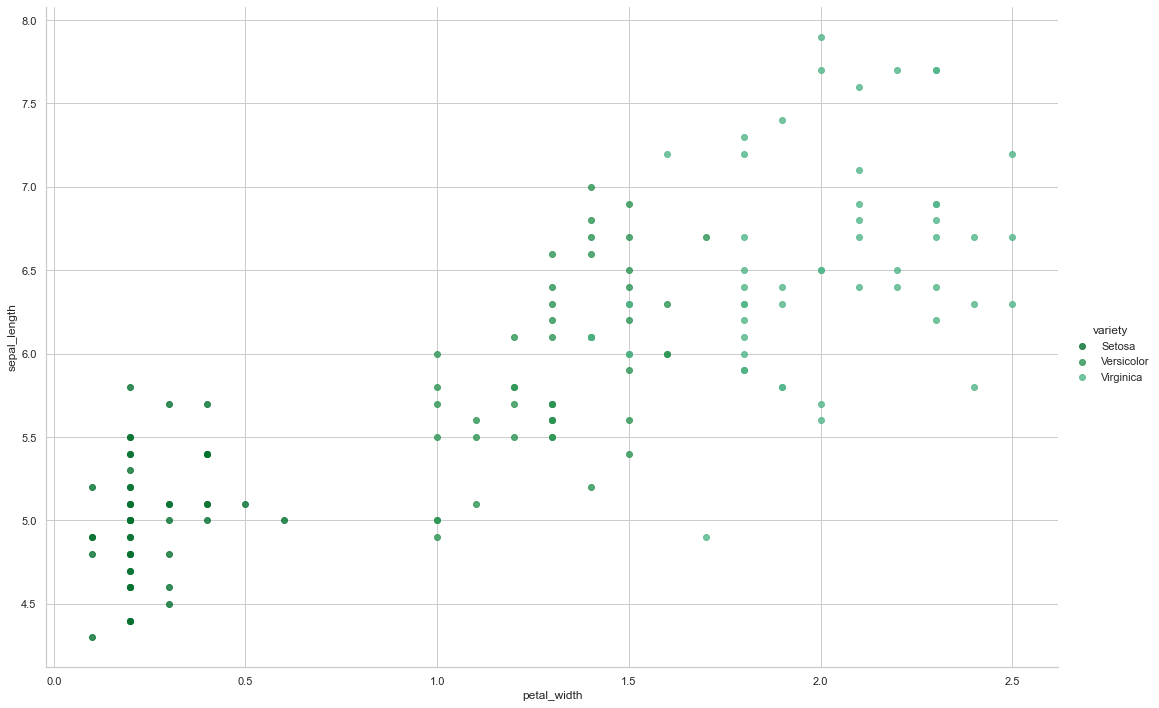

In [17]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="petal_width", y="sepal_length", hue='variety', data=iris_data, fit_reg=False, height=10, aspect=1.5);

### Pyplot ###

     sepal_length  sepal_width  petal_length  petal_width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


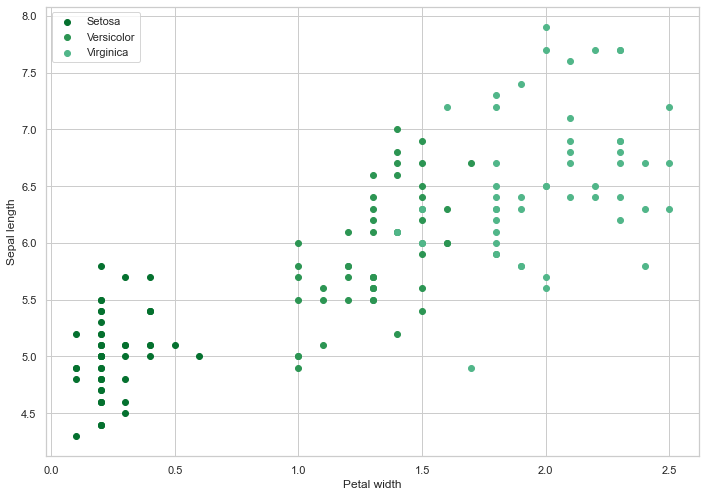

In [21]:
# Segregate the data.
setos = iris_data[iris_data['variety'] == 'Setosa']
versi = iris_data[iris_data['variety'] == 'Versicolor']
virgi = iris_data[iris_data['variety'] == 'Virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(setos['petal_width'], setos['sepal_length'], label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], label='Virginica')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

In [23]:
# How the segregation works.
iris_data['variety'] == 'Virginica'

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: variety, Length: 150, dtype: bool

In [24]:
iris_data[iris_data['variety'] == 'Virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,variety
100,6.3,3.3,6.0,2.5,Virginica
101,5.8,2.7,5.1,1.9,Virginica
102,7.1,3.0,5.9,2.1,Virginica
103,6.3,2.9,5.6,1.8,Virginica
104,6.5,3.0,5.8,2.2,Virginica


### Using groupby() ###

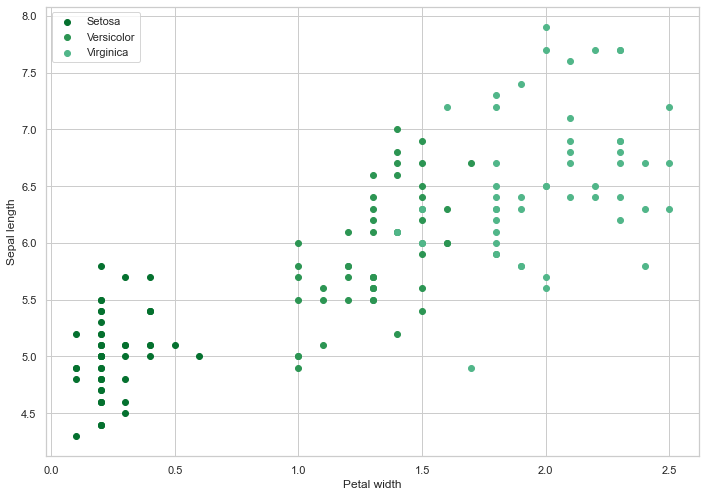

In [25]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for variety, data in iris_data.groupby('variety'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=variety)

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

In [26]:
# Group by typically takes a categorical variable.
x = iris_data.groupby('variety')
x

In [27]:
# Pivot tables.
x.mean()

,sepal_length,sepal_width,petal_length,petal_width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [28]:
# Looping through groupby().
# separates out the data to show each variety of iris separately
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: 'Setosa'
j looks like:
   sepal_length  sepal_width  petal_length  petal_width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa


i is: 'Versicolor'
j looks like:
    sepal_length  sepal_width  petal_length  petal_width     variety
50           7.0          3.2           4.7          1.4  Versicolor
51           6.4          3.2           4.5          1.5  Versicolor
52           6.9          3.1           4.9          1.5  Versicolor


i is: 'Virginica'
j looks like:
     sepal_length  sepal_width  petal_length  petal_width    variety
100           6.3          3.3           6.0          2.5  Virginica
101           5.8          2.7           5.1          1.9  Virginica
102           7.1          3.0           5.9          2.1  Virginica



### Test and Train Split

In [31]:
# Split the data frame in two.
train, test = mod.train_test_split(iris_data)

In [32]:
# Show some training data.
train.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
105,7.6,3.0,6.6,2.1,Virginica
89,5.5,2.5,4.0,1.3,Versicolor
55,5.7,2.8,4.5,1.3,Versicolor
16,5.4,3.9,1.3,0.4,Setosa
90,5.5,2.6,4.4,1.2,Versicolor


In [33]:
# The indices of the train array.
train.index

Int64Index([105,  89,  55,  16,  90,  40,   0, 122, 132, 129,
            ...
            139, 103, 125,  98,  20,  85, 127, 102,  86,  43],
           dtype='int64', length=112)

In [34]:
# Show some testing data.
test.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
38,4.4,3.0,1.3,0.2,Setosa
73,6.1,2.8,4.7,1.2,Versicolor
65,6.7,3.1,4.4,1.4,Versicolor
112,6.8,3.0,5.5,2.1,Virginica
113,5.7,2.5,5.0,2.0,Virginica


### Two Dimensions: Test Train Split ###

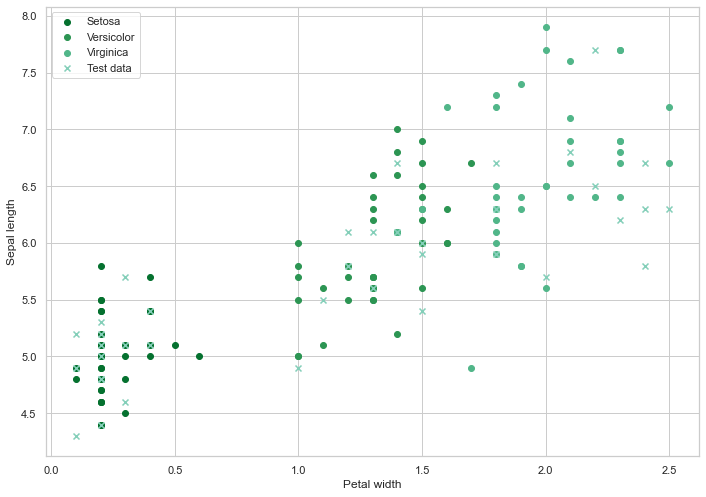

In [35]:
# Segregate the training data.
setos = train[train['variety'] == 'Setosa']
versi = train[train['variety'] == 'Versicolor']
virgi = train[train['variety'] == 'Virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(setos['petal_width'], setos['sepal_length'], marker='o', label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], marker='o', label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], marker='o', label='Virginica')

# Scatter plot for testing data.
ax.scatter(test['petal_width'], test['sepal_length'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

### Two Dimensions: Inputs and outputs ###

In [36]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['sepal_length', 'petal_width']], train['variety']

In [37]:
# Peek at the inputs.
inputs.head()

,sepal_length,petal_width
105,7.6,2.1
89,5.5,1.3
55,5.7,1.3
16,5.4,0.4
90,5.5,1.2


### Two Dimensions: Logistic regression ###
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Used to check data classification accuracy of the test data. Logistic regression works better here than linear regression because there are defined parameters of upper and lower data points, so the predicted 'y' will lie within those parameters.  Logistic regression creates a curve that covers the full dataset [26].   

In [38]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [39]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['sepal_length', 'petal_width']])
predictions

array(['Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Setosa',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Versicolor', 'Virginica',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica',
       'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica',
       'Setosa'], dtype=object)

In [40]:
# Eyeball the misclassifications.
predictions == test['variety']

38      True
73      True
65      True
112     True
113     True
27      True
32      True
48      True
11      True
18      True
39      True
114     True
84      True
117     True
37      True
35      True
88      True
136     True
6       True
30      True
57     False
5       True
104     True
21      True
148     True
119    False
108     True
71      True
13      True
92      True
80      True
100     True
70     False
140     True
91      True
61      True
123     True
19      True
Name: variety, dtype: bool

In [41]:
# What proportion were correct? Looks like 92% accurate
lre.score(test[['sepal_length', 'petal_width']], test['variety'])

0.9210526315789473

### Two Dimensions: Misclassified ###

In [42]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

<ipython-input-42-7f2fd5111565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,sepal_length,sepal_width,petal_length,petal_width,variety,predicted
38,4.4,3.0,1.3,0.2,Setosa,Setosa
73,6.1,2.8,4.7,1.2,Versicolor,Versicolor
65,6.7,3.1,4.4,1.4,Versicolor,Versicolor
112,6.8,3.0,5.5,2.1,Virginica,Virginica
113,5.7,2.5,5.0,2.0,Virginica,Virginica


In [43]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['variety']]
misclass

,sepal_length,sepal_width,petal_length,petal_width,variety,predicted
57,4.9,2.4,3.3,1.0,Versicolor,Setosa
119,6.0,2.2,5.0,1.5,Virginica,Versicolor
70,5.9,3.2,4.8,1.8,Versicolor,Virginica


In the results here, it's evident that more often the virginica and versicolor variety are misclassified than the setosa and the other two. This makes sense because in the previous visualisations and also in the graph below, the setosa is much less similar than versicolor and virginica in terms of petal/sepal length and width.

In [44]:
# Look at the descriptive statistics for the species.
train.groupby('variety').mean()

,sepal_length,sepal_width,petal_length,petal_width
variety,,,,
Setosa,5.011429,3.394286,1.460000,0.254286
Versicolor,5.969231,2.748718,4.271795,1.323077
Virginica,6.642105,2.973684,5.557895,1.992105


The above stats chart confirms this - that virginica and versicolor varieties are much more similar to each other. 

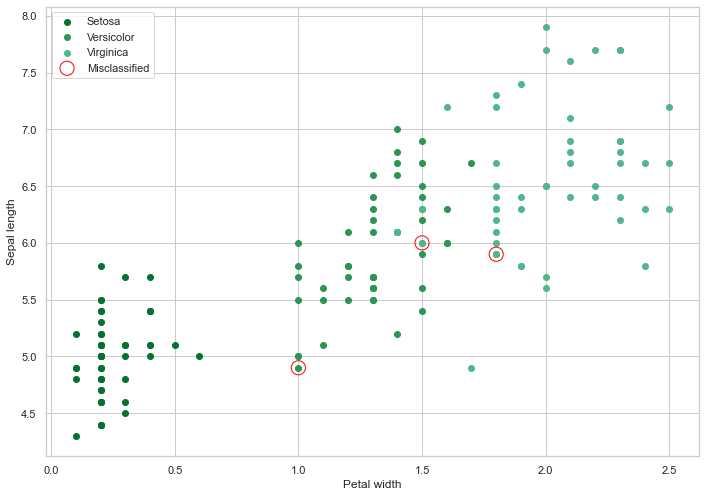

In [46]:
# New plot.
fig, ax = plt.subplots()

# Plot training data
for variety, data in iris_data.groupby('variety'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=variety)
    
# Plot misclassified.
ax.scatter(misclass['petal_width'], misclass['sepal_length'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

### Separating Setosa ###
Let's now lump the virginica and versicolor varieties together and compare their combined data points with the setosa variety.

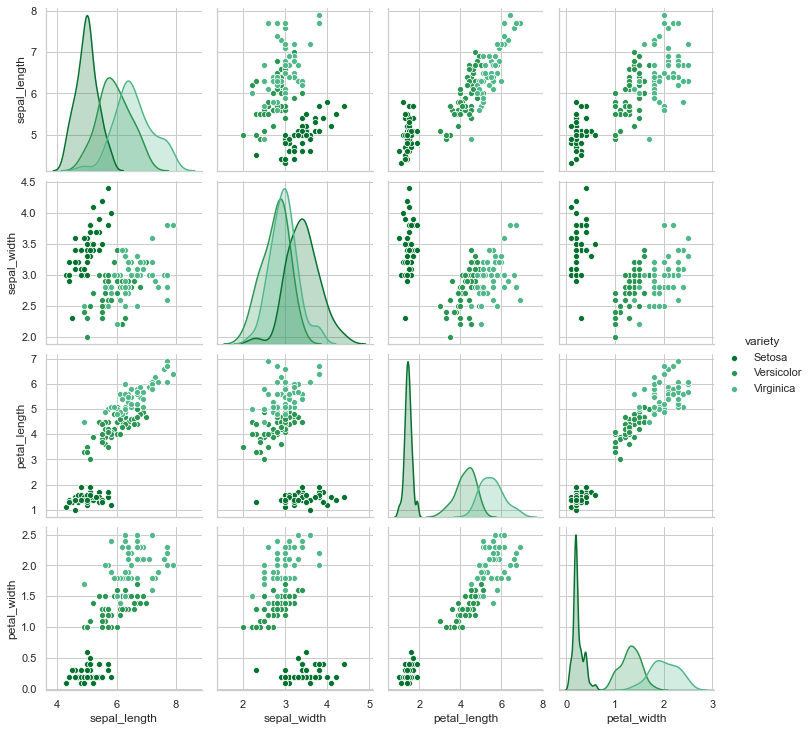

In [48]:
# Another look at this plot.
sns.pairplot(iris_data, hue='variety');

In [49]:
# Give the inputs and outputs convenient names.
inputs = train[['sepal_length', 'petal_width']]

# Set 'versicolor' and 'virginica' to 'other'.
outputs = train['variety'].apply(lambda x: x if x == 'Setosa' else 'other')

# outputs
outputs.unique()

array(['other', 'Setosa'], dtype=object)

In [50]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [51]:
actual = test['variety'].apply(lambda x: x if x == 'Setosa' else 'other')

# What proportion were correct? Again, 100%
lre.score(test[['sepal_length', 'petal_width']], actual)

1.0

### Using All Possible Inputs ###

In [67]:
# # Load the iris data set from a URL.
iris_data = pd.read_csv('data.csv')

In [68]:
# Split the data frame in two.
train, test = mod.train_test_split(iris_data)

In [69]:
# Use all four possible inputs.
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['variety']

In [70]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

/Users/keelylacy-osullivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [71]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
predictions

array(['Virginica', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Virginica', 'Setosa', 'Versicolor', 'Virginica',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Setosa', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Versicolor', 'Setosa', 'Versicolor', 'Setosa', 'Virginica',
       'Setosa', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Versicolor', 'Setosa', 'Virginica'], dtype=object)

In [93]:
# See the misclassifications.
(predictions == test['variety']).value_counts()

True     37
False     1
Name: variety, dtype: int64

In [73]:
# What proportion were correct? Looks like 100%
lre.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['variety'])

1.0

###  K Nearest Neighbours Classifier ###
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

The KNN classifier is "a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point" [28].


In [94]:
# Load the iris data set 
iris_data = pd.read_csv('data.csv')

In [95]:
# Split the data frame in two.
train, test = mod.train_test_split(iris_data)

In [76]:
# Use all four possible inputs.
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['variety']

In [77]:
# Classifier.
knn = nei.KNeighborsClassifier()

In [78]:
# Fit.
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [79]:
# Test.
knn.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['variety'])

0.9473684210526315

In [80]:
# Predict.
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
(predictions == test['variety']).value_counts()

True     37
False     1
Name: variety, dtype: int64

In [81]:
# The score is just the accuracy in this case. 97% accuracy.
(predictions == test['variety']).value_counts(normalize=True)

True     0.973684
False    0.026316
Name: variety, dtype: float64

### Cross validation ###

https://scikit-learn.org/stable/modules/cross_validation.html

Now lets compare the results of the two classifiers and see which one is more accurate using cross validation.

In [96]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], iris_data['variety'])
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [84]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.9733333333333334 	 Standard Deviation: 0.02494438257849294


In [85]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], iris_data['variety'])
scores

/Users/keelylacy-osullivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

From the above output, it is evident that the KNN classifier is slightly more accurate than the Logistic Regression classifier. Perhaps this is because after the missclassification analysis, we could clearly see the missclassified data points and were able to determine a good k for the KNN, which returned a more accurate result. Whereas for the Logistic Regression classifier, we use the upper and lower data points for parameters, which left more of a margin for error.

# Acknowledgement and Explanation of Programming Errors 

#### Within this Jupyter Notebook, there are three errors that I did not have enough time to figure out how to fix.

1) <ipython-input-42-7f2fd5111565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions

#### This error is saying that I am trying to set a value from a copy of a slice from a DataFrame, or to my understanding, trying to use a piece of a copy instead f referencing the full original DataFrame.
    
2) /Users/keelylacy-osullivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(    
    
#### This error is telling me that my results could be optimised by reconfiguring my parameters so that more iterations can be shown in my output.   
    
3) /Users/keelylacy-osullivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
    
 #### Same error as 2 above.   
    
    

## References:

This project is based predominantly on the lecture materials given by Dr. Ian McLoughlin - not explicitly quoted in the body of the notebook, but referenced in the below list.

1.	https://en.wikipedia.org/wiki/Iris_flower_data_set
2.	https://github.com/RitRa/Project2018-iris/blob/master/Project%2B2018%2B-%2BFishers%2BIris%2Bdata%2Bset%2Banalysis.ipynb
3.	https://tableconvert.com/?output=csv&data=https://gist.github.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
4.	https://realpython.com/python-csv/
5.	https://stackoverflow.com/questions/1526607/extracting-data-from-a-csv-file-in-python
6.	https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
7.	https://www.w3schools.com/python/numpy_intro.asp
8.	https://seaborn.pydata.org/generated/seaborn.boxplot.html
9.	https://seaborn.pydata.org/tutorial/color_palettes.html
10.	https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet
11.	https://seaborn.pydata.org/generated/seaborn.scatterplot.html
12.	https://seaborn.pydata.org/tutorial/distributions.html
13.	https://docs.bokeh.org/en/latest/docs/reference/plotting.html
14.	https://docs.bokeh.org/en/latest/docs/reference/colors.html
15.	https://www.w3schools.com/colors/colors_groups.asp
16.	https://www.kaggle.com/abhishekkrg/python-iris-data-visualization-and-explanation/data
17.	https://stackoverflow.com/questions/7152762/how-to-redirect-print-output-to-a-file-using-python
18.	https://kite.com/python/answers/how-to-redirect-print-output-to-a-text-file-in-python
19.	https://unsplash.com/photos/gK6f8bKKic0
20.	https://docs.python.org/3/library/sys.html
21.	https://en.wikipedia.org/wiki/Iris_setosa
22.	https://en.wikipedia.org/wiki/Iris_versicolor
23.	https://en.wikipedia.org/wiki/Iris_virginica
24.	https://github.com/vwalsh86/Iris-Data-Set-Project
25. https://scikit-learn.org/stable/
26. https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-logistic-regression-using-python/#h2_3
27. https://github.com/KeelyC0d3s/Iris_Dataset_Project2020
28. https://scikit-learn.org/stable/modules/neighbors.html#classification
29. https://scikit-learn.org/stable/modules/cross_validation.html

# End